# 📌 Objective
This notebook aims to perform exploratory data analysis (EDA) on the `phishing.csv` dataset to understand the distribution of features, class balance, and insights that can influence model design.

# 📊 Data Overview
We begin by loading the phishing dataset and examining its dimensions, column types, null values, and general structure.

# 🔍 Key Findings
This section summarizes the key patterns found in the data:
- Class imbalance: Check how many phishing vs. non-phishing records
- Top features that correlate with the label
- Feature distributions and anomalies

# 💡 Modeling Insights
Based on the EDA, features show non-linear patterns, which motivates the use of tree-based models like Random Forest and XGBoost over linear models like Logistic Regression.

# 🧠 Exploratory Data Analysis (EDA) for Phishing Dataset
This notebook performs detailed exploratory data analysis (EDA) on the `phishing.csv` dataset.

## 📦 Step 1: Load and Preview the Dataset

In [1]:
import os
import pandas as pd

# ✅ Set correct path: dataset is in ../data relative to this notebook
BASE_DIR = os.getcwd()
data_path = os.path.join(BASE_DIR, "..", "data", "phishing.csv")
df = pd.read_csv(data_path)
df = df.rename(columns={"Result": "Label"})  # Rename for clarity
# Map original labels: -1 = phishing ➝ 1, 1 = legitimate ➝ 0
df['Label'] = df['Label'].map({-1: 1, 1: 0})

## 🧾 Step 2: Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

🔍 **Interpretation**: This summary provides an overview of the dataset's structure:
- Use `.info()` to identify column types and null entries.
- Use `.describe()` to view value distributions, min, max, and mean.
This is essential for identifying data cleaning or normalization steps.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


🔍 **Interpretation**: This summary provides an overview of the dataset's structure:
- Use `.info()` to identify column types and null entries.
- Use `.describe()` to view value distributions, min, max, and mean.
This is essential for identifying data cleaning or normalization steps.

## 🧼 Step 3: Missing Values

In [5]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Label     

## 📊 Step 4: Target Class Distribution

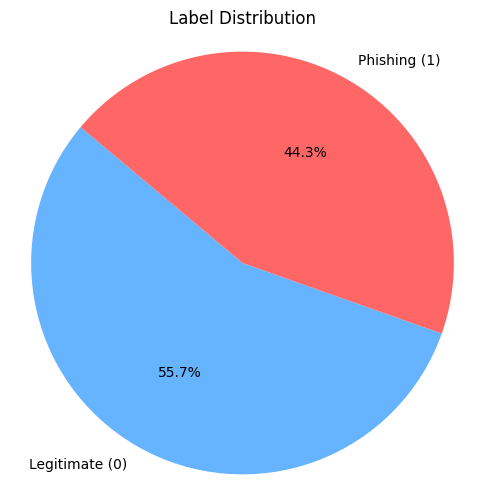

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['Label'].value_counts().sort_index()
labels = ['Legitimate (0)', 'Phishing (1)']
sizes = [label_counts[0], label_counts[1]]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff6666'])
plt.title("Label Distribution")
plt.axis('equal')
plt.show()

### 📊 Label Distribution Interpretation
The pie chart illustrates the class distribution between legitimate and phishing samples. The imbalance (if significant) may bias simpler models like Logistic Regression. Balanced techniques or algorithms robust to imbalance (like XGBoost with scale_pos_weight) are better suited.

## 📌 Step 5: Correlation Heatmap

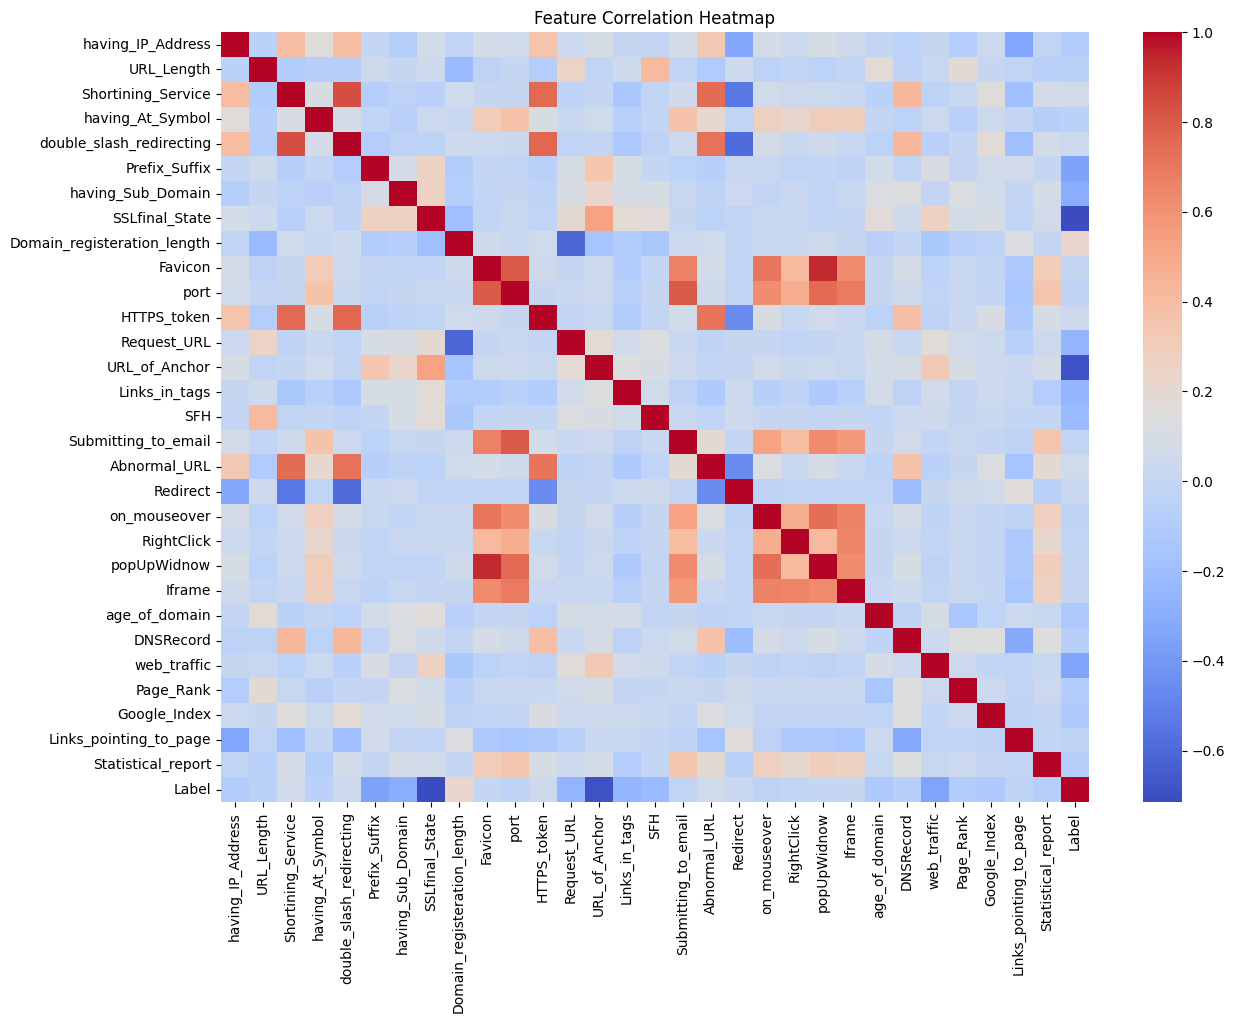

In [7]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

🧠 **Interpretation**: The heatmap reveals correlation between features:
- Strong correlation may indicate redundant features.
- Non-linear relationships suggest that tree-based models (e.g., Random Forest, XGBoost) may outperform linear ones.
You can use this to guide feature selection or engineering.

### 🧮 Correlation Heatmap Interpretation
The correlation heatmap shows that most features have low to moderate linear correlation with each other and with the target. This suggests that linear models may not capture meaningful patterns well, while tree-based models can handle weakly correlated and non-linear features.

## 📉 Step 6: Class-wise Feature Distributions

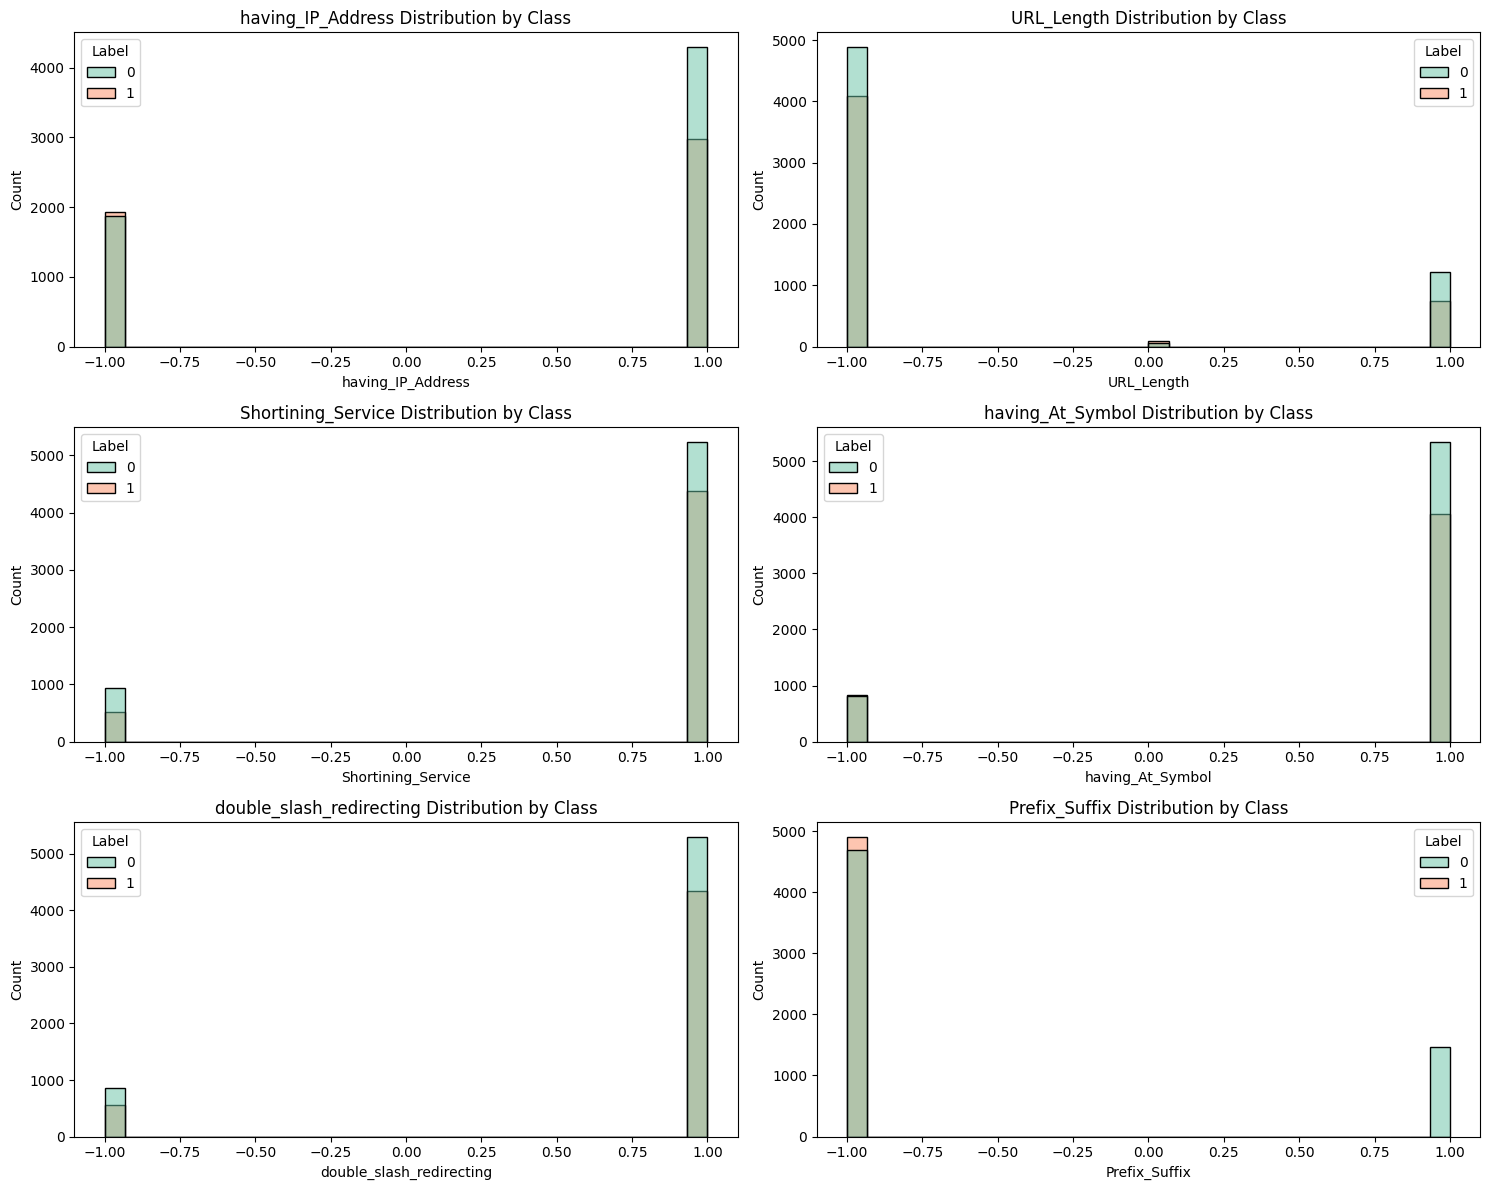

In [8]:
# Plot distributions for first 6 features
sample_features = df.columns[:6]

plt.figure(figsize=(15, 12))
for i, col in enumerate(sample_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, hue="Label", bins=30, kde=False, palette='Set2')
    plt.title(f"{col} Distribution by Class")
plt.tight_layout()
plt.show()

### 📈 Feature Distributions by Class
Histograms for selected features reveal that distributions are often asymmetric and overlapping. For example, some phishing indicators only spike under certain conditions. These non-Gaussian, multi-modal patterns are better captured by models like Random Forest or XGBoost.

## 🔍 Step 7: Boxplots for Feature Variance (Fixed for Seaborn >= 0.14)

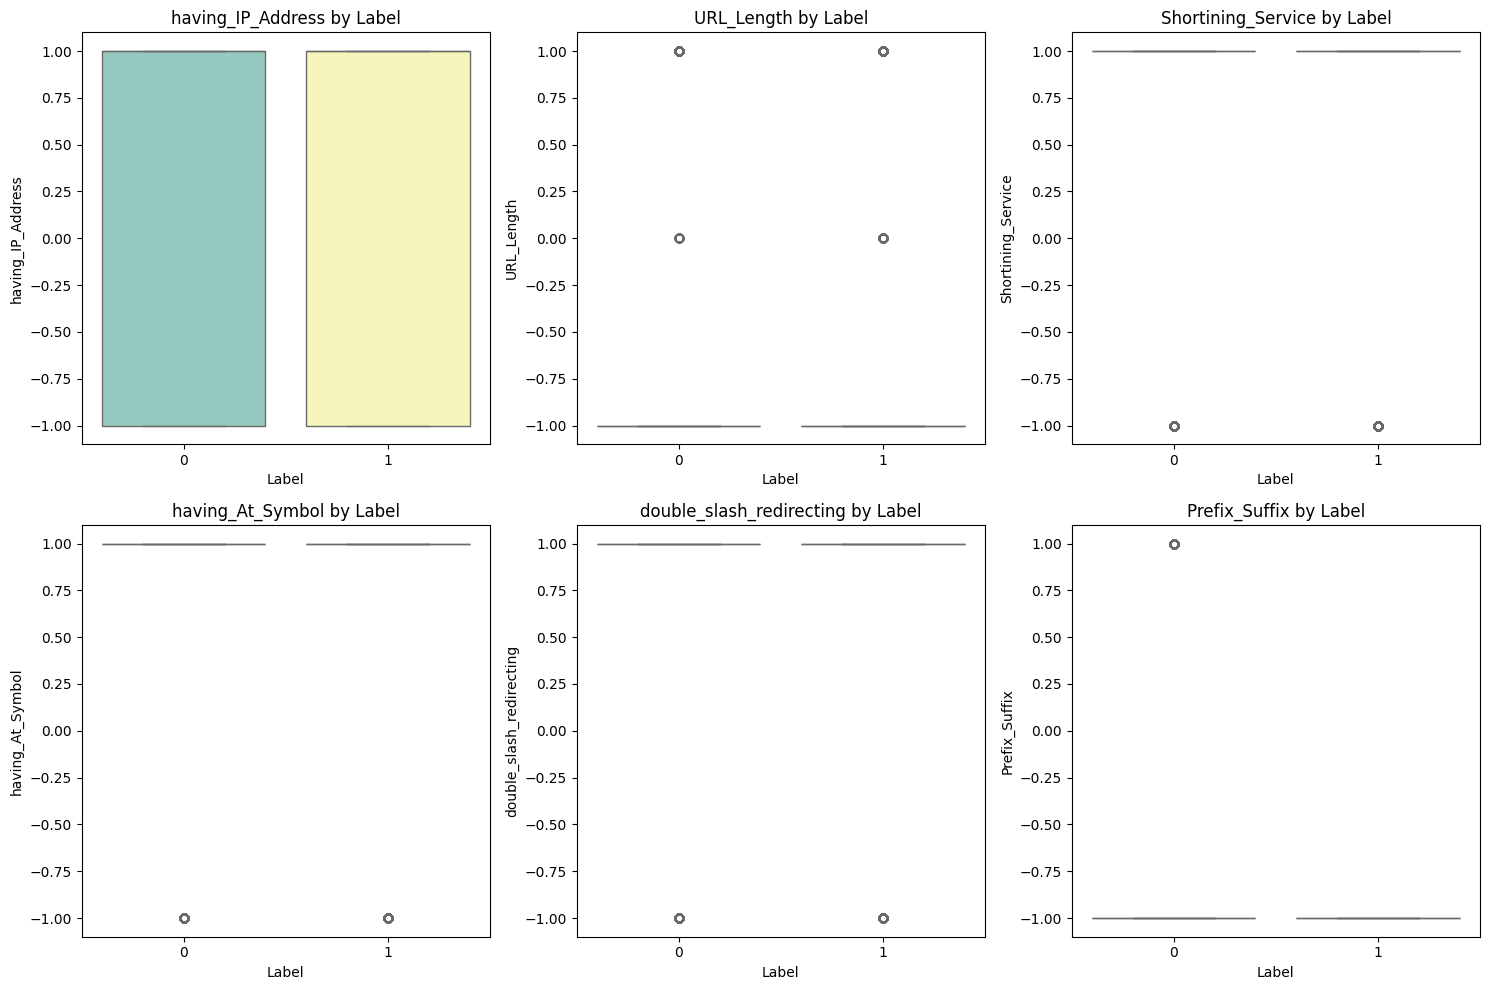

In [9]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:6]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Label', y=col, data=df, hue='Label', palette='Set3', legend=False)
    plt.title(f"{col} by Label")
plt.tight_layout()
plt.show()

### 📦 Boxplot Analysis and Non-Linear Evidence
Box plots show different medians and ranges for phishing vs. legitimate samples. For instance, some features have very different interquartile ranges and outliers depending on the label. This implies that the decision boundary is not a straight line — supporting the use of non-linear models like Random Forest and XGBoost over Logistic Regression.

## ✅ Summary:
- Checked data structure, types, and null values
- Reviewed label distribution and correlations
- Visualized feature distributions and potential separation
- Ready to proceed with feature selection or model training